In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

In [2]:
# zomato = pd.read_excel('./data/Zomato mock data.xlsx', sheet_name=0)
# zomato.to_csv('./data/zomato_mock_data.csv', index=False)

In [3]:
# data_dictionary = pd.read_excel('./data/Zomato mock data.xlsx', sheet_name=1)
# data_dictionary = data_dictionary.drop('Table', axis=1)
# data_dictionary.dropna().reset_index(drop=True).to_csv('./data/Data_Dictionary.csv', index=False)

In [4]:
zomato = pd.read_csv('./data/zomato_mock_data.csv')
zomato

,order_id,order_time,analytical_customer_id,is_acquisition,is_successful,reason,sub_reason,owner,delivery_arrangement,gmv_amount_lc,...,vertical_class,vertical,is_affordable_freedelivery,is_affordable_item,is_affordable_gem,is_affordable_restaurant,is_affordable_voucher,is_affordable,affordability_amt_total,City
0,544145594,2021-09-01 10:41:53,6zWSp9yqnEQuq4N6ykRgbbdQ,False,True,NaN,NaN,NaN,TGO,134.6900,...,food,food,False,False,False,False,False,False,NaN,Chennai
1,544478492,2021-09-01 18:17:52,TtmFFw26sQR26nBE2RykhxQA,False,True,NaN,NaN,NaN,TGO,134.6454,...,food,food,False,False,False,False,False,False,NaN,Chennai
2,544358032,2021-09-01 15:56:56,7pB4MC2aBPRdajLH2wPvIvAA,False,True,NaN,NaN,NaN,TGO,84.4900,...,food,food,False,False,False,False,False,False,NaN,Chennai
3,544366924,2021-09-01 16:09:09,AFedsf0e-lSZer_X0eR4VE-g,False,True,NaN,NaN,NaN,TGO,320.0130,...,food,food,False,False,False,False,False,False,NaN,Chennai
4,544372362,2021-09-01 16:16:32,JDYqF36aULSEaWsz604DuuRw,False,True,NaN,NaN,NaN,TGO,83.9900,...,food,food,False,False,False,False,False,False,NaN,Chennai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119880,642783788,2022-01-01 09:50:45,_B1YUyVOo-RLOoFMVCiTi-DQ,True,True,NaN,NaN,NaN,TMP,71.0000,...,food,food,False,False,False,False,False,False,NaN,Chennai
119881,642718374,2022-01-01 03:24:56,yTrHLDAuhuScuiCHABzNUdWA,False,True,NaN,NaN,NaN,TMP,250.0000,...,food,food,False,False,False,False,False,False,NaN,Chennai
119882,642739962,2022-01-01 06:58:07,jWIm4qj6vORl6B1ejy0EImDQ,False,True,NaN,NaN,NaN,TMP,98.0000,...,food,food,False,False,False,False,False,False,NaN,Chennai
119883,643440356,2022-01-01 23:00:07,RiSAcy9SUKT5SU_k9rWqVeug,False,True,NaN,NaN,NaN,TMP,270.0000,...,food,food,False,False,False,False,False,False,NaN,Delhi


In [5]:
# zomato_profile = ProfileReport(zomato, title="Zomato Profiling Report")
# zomato_profile

# Wrong Data

## Wrong Calculation

In [6]:
zomato.loc[zomato['affordability_amt_total'].notna(), 'pay_amount'] = zomato['basket_amount_lc']+zomato['delivery_fee_amount_lc'] - zomato['affordability_amt_total']
zomato.loc[zomato['affordability_amt_total'].isna(), 'pay_amount'] = zomato['basket_amount_lc']+zomato['delivery_fee_amount_lc']
zomato

,order_id,order_time,analytical_customer_id,is_acquisition,is_successful,reason,sub_reason,owner,delivery_arrangement,gmv_amount_lc,...,vertical,is_affordable_freedelivery,is_affordable_item,is_affordable_gem,is_affordable_restaurant,is_affordable_voucher,is_affordable,affordability_amt_total,City,pay_amount
0,544145594,2021-09-01 10:41:53,6zWSp9yqnEQuq4N6ykRgbbdQ,False,True,NaN,NaN,NaN,TGO,134.6900,...,food,False,False,False,False,False,False,NaN,Chennai,134.6900
1,544478492,2021-09-01 18:17:52,TtmFFw26sQR26nBE2RykhxQA,False,True,NaN,NaN,NaN,TGO,134.6454,...,food,False,False,False,False,False,False,NaN,Chennai,134.6454
2,544358032,2021-09-01 15:56:56,7pB4MC2aBPRdajLH2wPvIvAA,False,True,NaN,NaN,NaN,TGO,84.4900,...,food,False,False,False,False,False,False,NaN,Chennai,84.4900
3,544366924,2021-09-01 16:09:09,AFedsf0e-lSZer_X0eR4VE-g,False,True,NaN,NaN,NaN,TGO,320.0130,...,food,False,False,False,False,False,False,NaN,Chennai,320.0130
4,544372362,2021-09-01 16:16:32,JDYqF36aULSEaWsz604DuuRw,False,True,NaN,NaN,NaN,TGO,83.9900,...,food,False,False,False,False,False,False,NaN,Chennai,83.9900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119880,642783788,2022-01-01 09:50:45,_B1YUyVOo-RLOoFMVCiTi-DQ,True,True,NaN,NaN,NaN,TMP,71.0000,...,food,False,False,False,False,False,False,NaN,Chennai,71.0000
119881,642718374,2022-01-01 03:24:56,yTrHLDAuhuScuiCHABzNUdWA,False,True,NaN,NaN,NaN,TMP,250.0000,...,food,False,False,False,False,False,False,NaN,Chennai,250.0000
119882,642739962,2022-01-01 06:58:07,jWIm4qj6vORl6B1ejy0EImDQ,False,True,NaN,NaN,NaN,TMP,98.0000,...,food,False,False,False,False,False,False,NaN,Chennai,98.0000
119883,643440356,2022-01-01 23:00:07,RiSAcy9SUKT5SU_k9rWqVeug,False,True,NaN,NaN,NaN,TMP,270.0000,...,food,False,False,False,False,False,False,NaN,Delhi,270.0000


In [7]:
# 값이 맞지 않는 데이터 총 23122개로
zomato = zomato.assign(is_consistent= zomato['pay_amount'].round(2)==zomato['gmv_amount_lc'].round(2))
zomato

,order_id,order_time,analytical_customer_id,is_acquisition,is_successful,reason,sub_reason,owner,delivery_arrangement,gmv_amount_lc,...,is_affordable_freedelivery,is_affordable_item,is_affordable_gem,is_affordable_restaurant,is_affordable_voucher,is_affordable,affordability_amt_total,City,pay_amount,is_consistent
0,544145594,2021-09-01 10:41:53,6zWSp9yqnEQuq4N6ykRgbbdQ,False,True,NaN,NaN,NaN,TGO,134.6900,...,False,False,False,False,False,False,NaN,Chennai,134.6900,True
1,544478492,2021-09-01 18:17:52,TtmFFw26sQR26nBE2RykhxQA,False,True,NaN,NaN,NaN,TGO,134.6454,...,False,False,False,False,False,False,NaN,Chennai,134.6454,True
2,544358032,2021-09-01 15:56:56,7pB4MC2aBPRdajLH2wPvIvAA,False,True,NaN,NaN,NaN,TGO,84.4900,...,False,False,False,False,False,False,NaN,Chennai,84.4900,True
3,544366924,2021-09-01 16:09:09,AFedsf0e-lSZer_X0eR4VE-g,False,True,NaN,NaN,NaN,TGO,320.0130,...,False,False,False,False,False,False,NaN,Chennai,320.0130,True
4,544372362,2021-09-01 16:16:32,JDYqF36aULSEaWsz604DuuRw,False,True,NaN,NaN,NaN,TGO,83.9900,...,False,False,False,False,False,False,NaN,Chennai,83.9900,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119880,642783788,2022-01-01 09:50:45,_B1YUyVOo-RLOoFMVCiTi-DQ,True,True,NaN,NaN,NaN,TMP,71.0000,...,False,False,False,False,False,False,NaN,Chennai,71.0000,True
119881,642718374,2022-01-01 03:24:56,yTrHLDAuhuScuiCHABzNUdWA,False,True,NaN,NaN,NaN,TMP,250.0000,...,False,False,False,False,False,False,NaN,Chennai,250.0000,True
119882,642739962,2022-01-01 06:58:07,jWIm4qj6vORl6B1ejy0EImDQ,False,True,NaN,NaN,NaN,TMP,98.0000,...,False,False,False,False,False,False,NaN,Chennai,98.0000,True
119883,643440356,2022-01-01 23:00:07,RiSAcy9SUKT5SU_k9rWqVeug,False,True,NaN,NaN,NaN,TMP,270.0000,...,False,False,False,False,False,False,NaN,Delhi,270.0000,True


In [8]:
zomato[zomato['is_consistent']==False][['basket_amount_lc', 'delivery_fee_amount_lc', 'affordability_amt_total','gmv_amount_lc', 'pay_amount']]

,basket_amount_lc,delivery_fee_amount_lc,affordability_amt_total,gmv_amount_lc,pay_amount
7,152.00,2.99,38.000,154.99,116.990
11,107.25,19.99,6.750,127.24,120.490
12,117.00,4.99,64.398,71.99,57.592
14,130.00,9.99,30.000,139.99,109.990
24,185.00,9.99,15.000,194.99,179.990
...,...,...,...,...,...
119830,49.00,16.00,25.000,65.00,40.000
119858,63.00,25.00,53.000,88.00,35.000
119865,199.00,15.00,69.000,214.00,145.000
119878,329.53,20.00,69.000,349.53,280.530


In [12]:
(zomato['is_consistent'].value_counts(normalize=True)*100).round(2)

True     80.71
False    19.29
Name: is_consistent, dtype: float64

## Minus

In [13]:
zomato.loc[zomato['pay_amount']<0, 'is_minus_amount'] = True
zomato.loc[zomato['pay_amount']>0, 'is_minus_amount'] = False

In [14]:
minus_data =  zomato[zomato['is_minus_amount']==True]
minus_data

,order_id,order_time,analytical_customer_id,is_acquisition,is_successful,reason,sub_reason,owner,delivery_arrangement,gmv_amount_lc,...,is_affordable_item,is_affordable_gem,is_affordable_restaurant,is_affordable_voucher,is_affordable,affordability_amt_total,City,pay_amount,is_consistent,is_minus_amount
1038,546113690,2021-09-03 18:25:27,0o6ohQ9ilXQQiXLo93-f3FnA,False,True,NaN,NaN,NaN,TGO,15.00,...,True,False,True,True,True,71.00,Mysore,-6.00,False,True
1056,545228486,2021-09-02 17:37:18,czvUbkt6AmQi6FE8tqTyde7Q,False,True,NaN,NaN,NaN,TGO,133.75,...,True,False,False,False,True,257.52,Delhi,-123.77,False,True
1104,545920941,2021-09-03 14:49:31,KmHkhfAumST6uP-_ATUzAXZQ,False,True,NaN,NaN,NaN,TGO,24.50,...,True,False,False,False,True,42.00,Vadodara,-17.50,False,True
1263,547672867,2021-09-05 18:22:26,ZvyDHi6apFTbaADh62LiLvjA,False,True,NaN,NaN,NaN,TGO,158.40,...,True,False,False,False,True,316.80,Delhi,-158.40,False,True
1273,546276021,2021-09-03 20:52:43,U7IiRgoS5eRiSwvJo0tk7gKA,False,True,NaN,NaN,NaN,TMP,237.00,...,True,False,False,False,True,278.00,Chennai,-41.00,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119601,643452963,2022-01-01 23:21:13,QDOngluaITRLacZquKshav6Q,False,True,NaN,NaN,NaN,TGO,40.94,...,True,False,False,False,True,206.00,Coimbatore,-115.06,False,True
119605,643459323,2022-01-01 23:32:02,B8CbYwYeSFRZeS7TYFdOZfJg,False,True,NaN,NaN,NaN,TGO,59.99,...,True,False,True,False,True,200.00,Coimbatore,-90.01,False,True
119734,642690297,2022-01-01 01:28:36,nnhZOvJK7uSSKxXHJmEbuOqg,False,True,NaN,NaN,NaN,TMP,159.00,...,True,False,False,False,True,288.00,Chennai,-129.00,False,True
119741,643158035,2022-01-01 17:52:13,f6quHWDe6kQ6eYMQDrlz9fYA,False,True,NaN,NaN,NaN,TMP,139.00,...,True,False,False,False,True,144.00,Chennai,-5.00,False,True


In [15]:
# minus_data_profile = ProfileReport(minus_data, title="minus_data Profiling Report")
# minus_data_profile

# Success vs Failed

In [16]:
success_delivery = zomato[zomato['is_successful']==True]
failed_delivery = zomato[zomato['is_successful']==False]

In [17]:
print(success_delivery.shape[0])
print(failed_delivery.shape[0])

100169
19716


In [18]:
display(zomato.is_acquisition.value_counts(normalize=True))
display(zomato.is_successful.value_counts(normalize=True))

False    0.968603
True     0.031397
Name: is_acquisition, dtype: float64

True     0.835542
False    0.164458
Name: is_successful, dtype: float64

In [19]:
delivery_arrangement = pd.concat([success_delivery.delivery_arrangement.value_counts(normalize=True)*100, 
                                  failed_delivery.delivery_arrangement.value_counts(normalize=True)*100], axis=1).round(2)
delivery_arrangement.columns = ['ratio_success', 'ratio_failed']
delivery_arrangement

,ratio_success,ratio_failed
TGO,77.65,77.91
TMP,22.35,22.09


In [20]:
delivery_platform = pd.concat([success_delivery.platform.value_counts(normalize=True)*100, 
                               failed_delivery.platform.value_counts(normalize=True)*100], axis=1).round(2)
delivery_platform.columns = ['ratio_success', 'ratio_failed']
delivery_platform

,ratio_success,ratio_failed
android,51.56,51.83
iOS,47.07,47.19
desktop web,0.87,0.58
mobile web,0.50,0.41


# TGO vs TMP

In [22]:
failed_delivery_TGO = failed_delivery[failed_delivery['delivery_arrangement']=='TGO']
failed_delivery_TMP = failed_delivery[failed_delivery['delivery_arrangement']=='TMP']

In [67]:
failed_delivery_reason = pd.concat([failed_delivery_TGO.reason.value_counts(normalize=True)*100, failed_delivery_TMP.reason.value_counts(normalize=True)*100], axis=1).round(2)
failed_delivery_reason.columns = ['ratio_TGO', 'ratio_TMP']
failed_delivery_reason = failed_delivery_reason.sort_values('ratio_TGO')

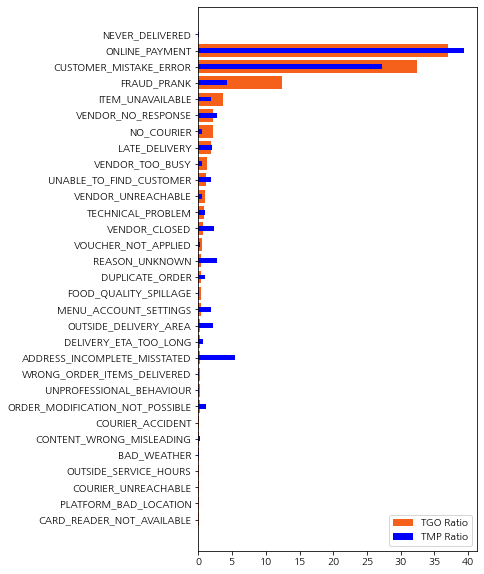

In [68]:
plt.figure(figsize=(5,10))
plt.barh(failed_delivery_reason['ratio_TGO'].index, failed_delivery_reason['ratio_TGO'].values, color='#f5611a', label='TGO Ratio')
plt.barh(failed_delivery_reason['ratio_TMP'].index, failed_delivery_reason['ratio_TMP'].values, height=0.3, color='b', label='TMP Ratio')
plt.legend(loc='lower right')
plt.show()

In [70]:
failed_delivery_sub_reason = pd.concat([failed_delivery_TGO.sub_reason.value_counts(normalize=True)*100, failed_delivery_TMP.sub_reason.value_counts(normalize=True)*100], axis=1).round(2)
failed_delivery_sub_reason.columns = ['ratio_TGO', 'ratio_TMP']
failed_delivery_sub_reason  = failed_delivery_sub_reason.sort_values('ratio_TGO')

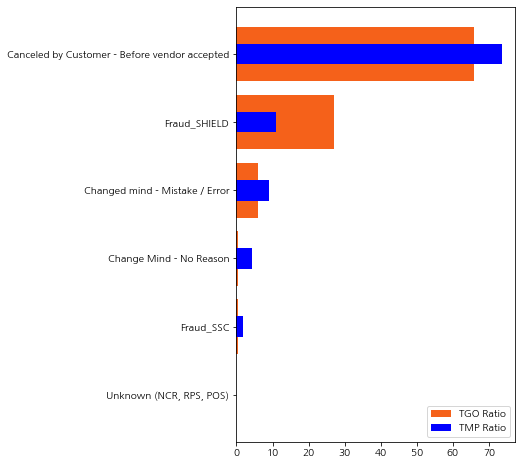

In [75]:
plt.figure(figsize=(5,8))
plt.barh(failed_delivery_sub_reason['ratio_TGO'].index, failed_delivery_sub_reason['ratio_TGO'].values, color='#f5611a', label='TGO Ratio')
plt.barh(failed_delivery_sub_reason['ratio_TMP'].index, failed_delivery_sub_reason['ratio_TMP'].values, height=0.3, color='b', label='TMP Ratio')
plt.legend(loc='lower right')
plt.show()

In [72]:
failed_delivery_owner = pd.concat([failed_delivery_TGO.owner.value_counts(normalize=True)*100, failed_delivery_TMP.owner.value_counts(normalize=True)*100], axis=1).round(2)
failed_delivery_owner.columns = ['ratio_TGO', 'ratio_TMP']
failed_delivery_owner = failed_delivery_owner.sort_values('ratio_TGO')

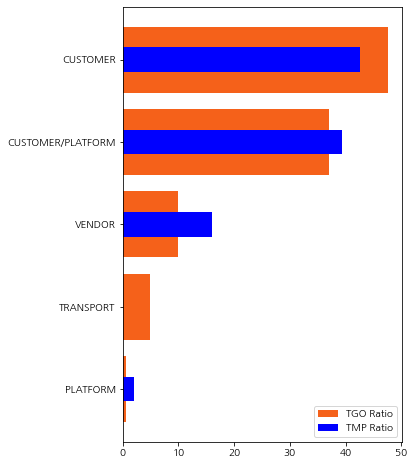

In [74]:
plt.figure(figsize=(5,8))
plt.barh(failed_delivery_owner['ratio_TGO'].index, failed_delivery_owner['ratio_TGO'].values, color='#f5611a', label='TGO Ratio')
plt.barh(failed_delivery_owner['ratio_TMP'].index, failed_delivery_owner['ratio_TMP'].values, height=0.3, color='b', label='TMP Ratio')
plt.legend(loc='lower right')
plt.show()

# By Owner

In [89]:
pd.crosstab(failed_delivery['reason'], failed_delivery['owner'], margins=True)

owner,CUSTOMER,CUSTOMER/PLATFORM,PLATFORM,TRANSPORT,VENDOR,All
reason,,,,,,
ADDRESS_INCOMPLETE_MISSTATED,272,0,0,0,0,272
BAD_WEATHER,0,0,0,3,6,9
CARD_READER_NOT_AVAILABLE,0,0,0,1,0,1
CONTENT_WRONG_MISLEADING,0,0,0,0,16,16
COURIER_ACCIDENT,0,0,0,9,0,9
COURIER_UNREACHABLE,0,0,0,2,0,2
CUSTOMER_MISTAKE_ERROR,6161,0,0,0,0,6161
DELIVERY_ETA_TOO_LONG,30,0,0,21,26,77
DUPLICATE_ORDER,97,0,0,0,0,97


In [96]:
owner_VENDOR = failed_delivery[failed_delivery['owner']=='VENDOR']
owner_CUSTOMER = failed_delivery[failed_delivery['owner']=='CUSTOMER']
owner_TRANSPORT = failed_delivery[failed_delivery['owner']=='TRANSPORT']
owner_PLATFORM = failed_delivery[failed_delivery['owner']=='PLATFORM']
owner_CUSTOMER_PLATFORM = failed_delivery[failed_delivery['owner']=='CUSTOMER/PLATFORM']

owner_df_list = [owner_VENDOR, owner_CUSTOMER, owner_TRANSPORT, owner_PLATFORM, owner_CUSTOMER_PLATFORM]
color_list = ['r', 'b', 'g', 'm', 'c']

In [117]:
owner_VENDOR['owner'].iloc[0]

'VENDOR'

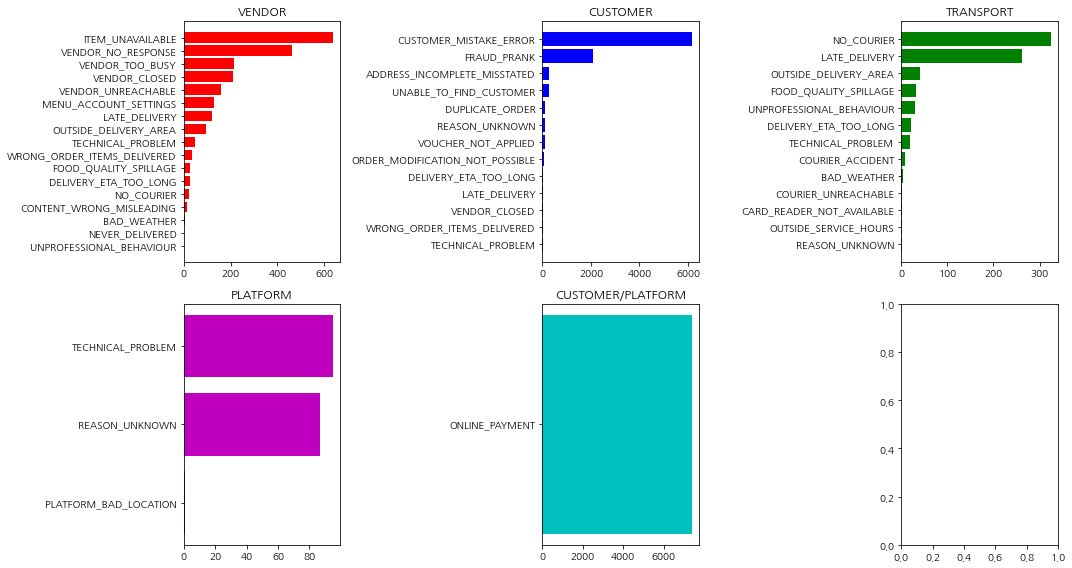

In [125]:
fig, axes = plt.subplots(2, 3, figsize=(15,8))
for owner, ax, color in zip(owner_df_list, axes.ravel(), color_list) : 
    if ax==axes[1][2] : 
        break
    reason_count = owner['reason'].value_counts().sort_values(ascending=True)
    ax.barh(reason_count.index, reason_count.values, color=color)
    ax.set_title(owner['owner'].iloc[0])
plt.tight_layout()
plt.show()